In [7]:
import pandas as pd
import sqlalchemy
# from binance.client import Client
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import os
import math

In [3]:
#paper
# api_Key = 'MrJxzbG8M2mPnBIY2M8mjDakt4O3DasJFmmKObyBQ1ScqmdZtXw00geR1dNB3RgZ'
# api_secret = 'G4ZIDktXNCtVmnVfSep2JViuBrnS0vulXHI2JPZGzTkGHotuXwQyjujPguqTpxEG'

# client = Client(api_Key, api_secret)
#real
api_Key = 'nux5568AFIq0eL63qdQpsFHgG08nKGg3aO3FRDduzxhxOTx3l3FN1kpMTyXbE8it'
api_secret ='kgj4GJz65eqaumiBH0Bgu4L7eaG4eVqJc9u6UZ12ykChYaMgbN6fZDzYr5EO0fyl'
client = Client(api_Key, api_secret)
engine = sqlalchemy.create_engine('sqlite:///BTCUSDTstream.db')

In [70]:
def get_binanace_quantity(sym,quantity):
    symbol_info = client.get_symbol_info(sym)
    step_size = 0.0
    for f in symbol_info['filters']:
        if f['filterType'] == 'LOT_SIZE':
            step_size = float(f['stepSize'])
    precision = int(round(-math.log(step_size, 10), 0))
    quantity = float(round(quantity, 6))
    return quantity
sym = 'ETHUSDT'
total_per_trade = 10
price = float(client.get_symbol_ticker(symbol=sym)['price'])
quantity = total_per_trade / price
size = get_binanace_quantity(sym,quantity)
client.futures_create_order(symbol=sym, side='BUY', type='MARKET', quantity=size)

BinanceAPIException: APIError(code=-1111): Precision is over the maximum defined for this asset.

In [68]:
client.futures_create_order(symbol=sym, side='SELL', type='MARKET', quantity=size)

BinanceAPIException: APIError(code=-1111): Precision is over the maximum defined for this asset.

In [69]:
quantity

0.004546033131489463

In [66]:
size

219.749

In [59]:
float(client.get_symbol_ticker(symbol='ETHUSDT')['price'])

2196.65

In [4]:
client.create_test_order(symbol = 'DOGEUSDT',
                            side = Client.SIDE_BUY,
                            type = Client.ORDER_TYPE_MARKET,
                            quantity=34.6)

{}

In [22]:
client.create_test_order(symbol = 'DOGEUSDT',
                            side = Client.SIDE_BUY,
                            type = Client.ORDER_TYPE_MARKET,
                            quantity=34.6)
#下面這個就真的買了阿
# order = client.create_order(symbol = 'DOGEUSDT',
#             side = Client.SIDE_BUY,
#             type = Client.ORDER_TYPE_MARKET,
#             quantity=34.6)
price_per_trade = 10 #我一單就是10美金
quantity = float(round(34.6, precision))
order = client.futures_create_order(symbol = 'BTCUSDT',
            side='BUY',
            type='MARKET',
            quantity=quantity)
print(order)

BinanceAPIException: APIError(code=-2019): Margin is insufficient.

In [107]:
#真賣
# order = client.create_order(symbol = 'DOGEUSDT',
#             side = Client.SIDE_SELL,
#             type = Client.ORDER_TYPE_MARKET,
#             quantity=34.6)
# print(order)

{'symbol': 'DOGEUSDT', 'orderId': 1227585676, 'orderListId': -1, 'clientOrderId': 'TJxMbqxfsUQOy3ndX0Mx39', 'transactTime': 1622975126422, 'price': '0.00000000', 'origQty': '34.60000000', 'executedQty': '34.60000000', 'cummulativeQuoteQty': '12.74664000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '0.36840000', 'qty': '34.60000000', 'commission': '0.00002443', 'commissionAsset': 'BNB', 'tradeId': 260817926}]}


In [18]:
api_key = os.environ.get('binance_api')
api_secret = os.environ.get('binance_secret')

In [21]:
api_key = 'MrJxzbG8M2mPnBIY2M8mjDakt4O3DasJFmmKObyBQ1ScqmdZtXw00geR1dNB3RgZ'
api_secret = 'G4ZIDktXNCtVmnVfSep2JViuBrnS0vulXHI2JPZGzTkGHotuXwQyjujPguqTpxEG'
client = Client(api_key, api_secret)
client.API_URL = 'https://testnet.binance.vision/api'

In [22]:
print(client.get_account())

{'makerCommission': 0, 'takerCommission': 0, 'buyerCommission': 0, 'sellerCommission': 0, 'canTrade': True, 'canWithdraw': False, 'canDeposit': False, 'updateTime': 1622962480547, 'accountType': 'SPOT', 'balances': [{'asset': 'BNB', 'free': '1000.00000000', 'locked': '0.00000000'}, {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}, {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'}, {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'}, {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'}, {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'}, {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'}, {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}], 'permissions': ['SPOT']}


In [28]:
#print(client.futures_account_balance())
#print(client.get_margin_account())
print(client.get_asset_balance(asset='BTC'))

{'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}


In [25]:
# get latest price from Binance API
btc_price = client.get_symbol_ticker(symbol="BTCUSDT")
# print full output (dictionary)
print(btc_price["price"])

35659.97000000


In [33]:
order = client.create_order(symbol = 'BTCUSDT',
                            side = Client.SIDE_BUY,
                            type = Client.ORDER_TYPE_MARKET,
                            quantity=0.001)
order

{'symbol': 'BTCUSDT',
 'orderId': 712693,
 'orderListId': -1,
 'clientOrderId': 'UHR56f4hJfMzFVWAzSz9xF',
 'transactTime': 1622972491127,
 'price': '0.00000000',
 'origQty': '0.00100000',
 'executedQty': '0.00100000',
 'cummulativeQuoteQty': '36.24662000',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'fills': [{'price': '36246.62000000',
   'qty': '0.00100000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 143569}]}

In [4]:
df = pd.read_sql('BTCUSDT', engine)

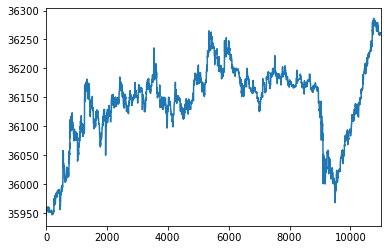

In [5]:
%matplotlib inline
df.Price.plot()

In [99]:
# trend following

def strategy(entry, lookback, qty, open_position=False):
    while True:
        df = pd.read_sql('BTCUSDT', engine)
        lookbackperiod = df.iloc[-lookback:]
        cumret = (lookbackperiod.Price.pct_change() + 1).cumprod() -1
        if not open_position:
            if cumret[cumret.last_valid_index()] > entry:
                order = client.create_order(symbol = 'BTCUSDT',
                            side = Client.SIDE_BUY,
                            type = Client.ORDER_TYPE_MARKET,
                            quantity=qty)
                print(order)
                open_position = True
                break
        
    if open_position:
        while True:
            
            df = pd.read_sql('BTCUSDT', engine)
            
            sincebuy = df.loc[df.Time > pd.to_datetime(order['transactTime'],
                                                       unit = 'ms')]
            if len(sincebuy) > 1:
                sincebuyret = (sincebuy.Price.pct_change() +1).cumprod() -1
                last_entry = sincebuyret[sincebuyret.last_valid_index()]
                print(last_entry)
                if last_entry > 0.00015 or last_entry < -0.00015:
                    order = client.create_order(symbol = 'BTCUSDT',
                            side = Client.SIDE_SELL,
                            type = Client.ORDER_TYPE_MARKET,
                            quantity=qty)

                    print(order)
                    break
                

In [100]:
strategy(0.0002, 60, 0.001)

{'symbol': 'BTCUSDT', 'orderId': 715804, 'orderListId': -1, 'clientOrderId': '1c43V6WNUmMHv7bqbkqbLB', 'transactTime': 1622973979483, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '36.22912205', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '36200.00000000', 'qty': '0.00055300', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 144120}, {'price': '36264.00000000', 'qty': '0.00033200', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 144121}, {'price': '36268.47000000', 'qty': '0.00011500', 'commission': '0.00000000', 'commissionAsset': 'BTC', 'tradeId': 144122}]}
-0.00021902014099262068
{'symbol': 'BTCUSDT', 'orderId': 715806, 'orderListId': -1, 'clientOrderId': 'U0Fni3YdVw3erva2SN2JCY', 'transactTime': 1622973980147, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '36.04822000', 'status': 'FILLED', 'ti

In [101]:
order = client.create_order(symbol = 'BTCUSDT',
            side = Client.SIDE_SELL,
            type = Client.ORDER_TYPE_MARKET,
            quantity=0.001)

In [102]:
order

{'symbol': 'BTCUSDT',
 'orderId': 715888,
 'orderListId': -1,
 'clientOrderId': 'atP2PakP4Rxu6MZJyWmMCP',
 'transactTime': 1622974017657,
 'price': '0.00000000',
 'origQty': '0.00100000',
 'executedQty': '0.00100000',
 'cummulativeQuoteQty': '36.09916000',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'fills': [{'price': '36099.16000000',
   'qty': '0.00100000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 144136}]}

In [56]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
client = Client(api_key, api_secret)

# get market depth
depth = client.get_order_book(symbol='BNBBTC')

# place a test market buy order, to place an actual order use the create_order function
order = client.create_test_order(
    symbol='BNBBTC',
    side=Client.SIDE_BUY,
    type=Client.ORDER_TYPE_MARKET,
    quantity=100)

# get all symbol prices
prices = client.get_all_tickers()

# withdraw 100 ETH
# check docs for assumptions around withdrawals
from binance.exceptions import BinanceAPIException
try:
    result = client.withdraw(
        asset='ETH',
        address='<eth_address>',
        amount=100)
except BinanceAPIException as e:
    print(e)
else:
    print("Success")

# fetch list of withdrawals
withdraws = client.get_withdraw_history()

# fetch list of ETH withdrawals
eth_withdraws = client.get_withdraw_history(coin='ETH')

# get a deposit address for BTC
address = client.get_deposit_address(coin='BTC')

# get historical kline data from any date range

# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("ETHBTC", Client.KLINE_INTERVAL_30MINUTE, "1 Dec, 2017", "1 Jan, 2018")

# fetch weekly klines since it listed
klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")

# socket manager using threads
twm = ThreadedWebsocketManager()
twm.start()

# depth cache manager using threads
dcm = ThreadedDepthCacheManager()
dcm.start()

def handle_socket_message(msg):
    print(f"message type: {msg['e']}")
    print(msg)

def handle_dcm_message(depth_cache):
    print(f"symbol {depth_cache.symbol}")
    print("top 5 bids")
    print(depth_cache.get_bids()[:5])
    print("top 5 asks")
    print(depth_cache.get_asks()[:5])
    print("last update time {}".format(depth_cache.update_time))

twm.start_kline_socket(callback=handle_socket_message, symbol='BNBBTC')

dcm.start_depth_cache(callback=handle_dcm_message, symbol='ETHBTC')

# replace with a current options symbol
options_symbol = 'BTC-210430-36000-C'
dcm.start_options_depth_cache(callback=handle_dcm_message, symbol=options_symbol)

# join the threaded managers to the main thread
twm.join()
dcm.join()


NameError: name 'api_key' is not defined